# Introduction

Now that the linear regression models are done, it is now time to move onto deep neural network models. The deep neural network models will be done using the same dataset used in the linear regression models.

# Methodology

Like linear regression models, deep neural network models will be created using a computer to create models. However, deep neural networks can be used to discover relationships and inferences that are sometimes to complex to see with the naked eye.

Linear regression already discovered the hidden relationship between how weather effects each other, so it will be interesting to see what the deep neural networks models discover.

In [20]:
# Imports
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

# Getting the Dataset

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Finn-Anderson/BscHons-Data-Analytics/main/coldeepneuralnetworkdata.csv', index_col = 0, )

In [5]:
df

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Sat,Sun,Thu,Tue,Wed,year,mxpsd,max,fog,NUM_COLLISIONS
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2020,20.0,52.0,0,0.340174
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,2020,19.0,46.0,0,0.948172
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2020,15.0,46.9,0,1.338380
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2020,9.9,48.9,1,0.403696
5,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,2020,27.0,48.9,1,-0.158930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,7.0,55.9,1,-0.955761
1458,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,20.0,55.9,1,0.264004
1459,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2023,22.0,55.9,0,-0.048756
1460,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2023,18.1,48.9,1,-1.143417


In [6]:
df = df.dropna(axis = 0, how = "any")

In [7]:
df

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,...,Sat,Sun,Thu,Tue,Wed,year,mxpsd,max,fog,NUM_COLLISIONS
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,2020,20.0,52.0,0,0.340174
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,2020,19.0,46.0,0,0.948172
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2020,15.0,46.9,0,1.338380
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,2020,9.9,48.9,1,0.403696
5,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,2020,27.0,48.9,1,-0.158930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,2023,7.0,55.9,1,-0.955761
1458,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,2023,20.0,55.9,1,0.264004
1459,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,2023,22.0,55.9,0,-0.048756
1460,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2023,18.1,48.9,1,-1.143417


Drop rows with no data as those will not need to be processed in the deep neural network models.

# Why Analyse the Whole Dataset?

In the regression model, shuffling and selecting only 10% of the dataset was done before moving onto functionality. Because deep neural network's purpose is to solve complex datasets and make them simple, the whole dataset will be used. This should maximise the chance of showing new relationships across the whole dataset along with new data to analyse.

# Functionality

Below is the setup for the functionality. SCALE_NUM_COLLISIONS is a variable that will be used to tune the results and get the mean absolute error as low as possible.

getMeanAbsoluteError() returns the deep neural network model and the mean absolute error.

In [43]:
SCALE_NUM_COLLISIONS = 1.0

In [12]:
def getMeanAbsoluteError(df_input):
    training_set = df_input.sample(frac = 0.8, random_state = 0)

    test_set = df_input.drop(training_set.index)

    training_features = training_set.copy()
    test_features = test_set.copy()

    training_labels = training_features.pop("NUM_COLLISIONS")
    test_labels = test_features.pop("NUM_COLLISIONS")

    training_labels = training_labels/SCALE_NUM_COLLISIONS
    test_labels = test_labels/SCALE_NUM_COLLISIONS

    if training_set.columns.size > 2:
        normaliser = tf.keras.layers.Normalization(axis = -1)
    else:
        normaliser = tf.keras.layers.Normalization(input_shape = [1,], axis = None)

    normaliser.adapt(np.array(training_features))

    dnn_model = keras.Sequential([
      normaliser,
      layers.Dense(48, activation='relu'),
      layers.Dense(48, activation='relu'),
      layers.Dense(1)
  ])

    dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

    history = dnn_model.fit(
        training_features,
        training_labels,
        epochs = 100,
        verbose = 0,
        validation_split = 0.2)

    mean_absolute_error = dnn_model.evaluate(
        test_features,
        test_labels, verbose = 0)

    return {"model": dnn_model, "error": mean_absolute_error}

# Calibration

The calibration process will function the same as the linear regression models. Like in the linear regression models, the target for the mean absolute error is 0.01.

In [35]:
dnn_input_data = [df["year"], df["max"], df["mxpsd"], df["fog"], df["Sat"], df["Sun"], df["Mon"], df["Tue"], df["Wed"], df["Thu"], df["Fri"], df["Jan"], df["Feb"], df["Mar"], df["Apr"], df["May"], df["Jun"], df["Jul"], df["Aug"], df["Sep"], df["Oct"], df["Nov"], df["Dec"], df["NUM_COLLISIONS"]]
headers = ["year", "max", "mxpsd", "fog", "Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "NUM_COLLISIONS"]
df_dnn_input = pd.concat(dnn_input_data, axis = 1, keys = headers)

df_dnn_input.head()

,year,max,mxpsd,fog,Sat,Sun,Mon,Tue,Wed,Thu,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,NUM_COLLISIONS
1,2020,52.0,20.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.340174
2,2020,46.0,19.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.948172
3,2020,46.9,15.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.338380
4,2020,48.9,9.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.403696
5,2020,48.9,27.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.158930


In [44]:
results_dnn = getMeanAbsoluteError(df_dnn_input)

In [45]:
print(results_dnn["error"])

0.7127551436424255


In [46]:
SCALE_NUM_COLLISIONS = 100

In [47]:
results_dnn = getMeanAbsoluteError(df_dnn_input)

In [48]:
print(results_dnn["error"])

0.01495244912803173


# Analysing the Dataset

Now that the dataset is calibrated with a low mean absolute error, the deep neural network model can now be viewed and analysed.

In [59]:
input_data = pd.DataFrame.from_dict(data =
    {
        "year" : df["year"],
        "max" : df["max"],
        "mxpsd" : df["mxpsd"],
        "fog" : df["fog"],
        "Sat" : df["Sat"],
        "Sun" : df["Sun"],
        "Mon" : df["Mon"],
        "Tue" : df["Tue"],
        "Wed" : df["Wed"],
        "Thu" : df["Thu"],
        "Fri" : df["Fri"],
        "Jan" : df["Jan"],
        "Feb" : df["Feb"],
        "Mar" : df["Mar"],
        "Apr" : df["Apr"],
        "May" : df["May"],
        "Jun" : df["Jun"],
        "Jul" : df["Jul"],
        "Aug" : df["Aug"],
        "Sep" : df["Sep"],
        "Oct" : df["Oct"],
        "Nov" : df["Nov"],
        "Dec" : df["Dec"]
    })

In [60]:
dnn_predictions = results_dnn["model"].predict(input_data) * SCALE_NUM_COLLISIONS
dnn_predictions

45/45 [==============================] - 0s 1ms/step


array([[ 2.618819  ],
       [ 1.967388  ],
       [ 0.85547084],
       ...,
       [ 0.30852222],
       [-1.2624923 ],
       [-3.013109  ]], dtype=float32)

Text(0, 0.5, 'number of collisions standardized')

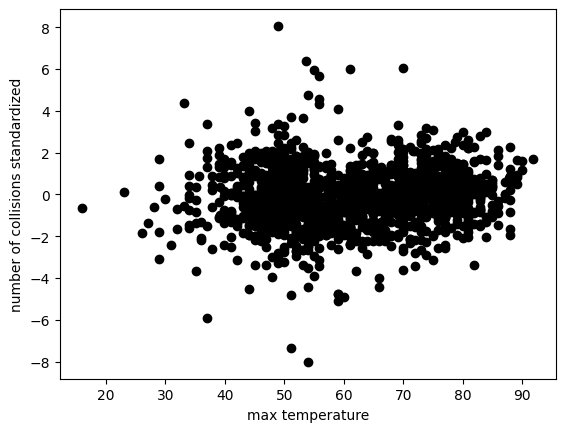

In [61]:
plt.scatter(input_data["max"], dnn_predictions, color="black")
plt.xlabel("max temperature")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

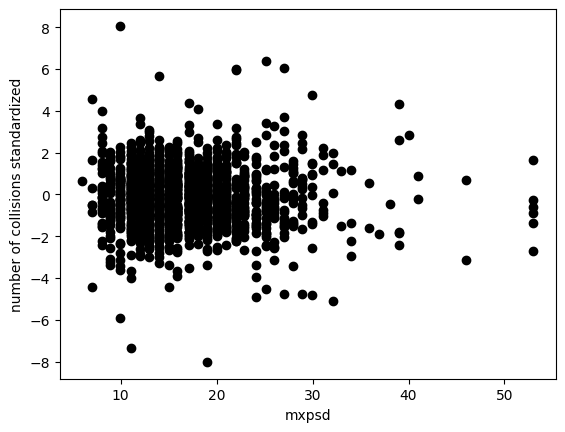

In [62]:
plt.scatter(input_data["mxpsd"], dnn_predictions, color="black")
plt.xlabel("mxpsd")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

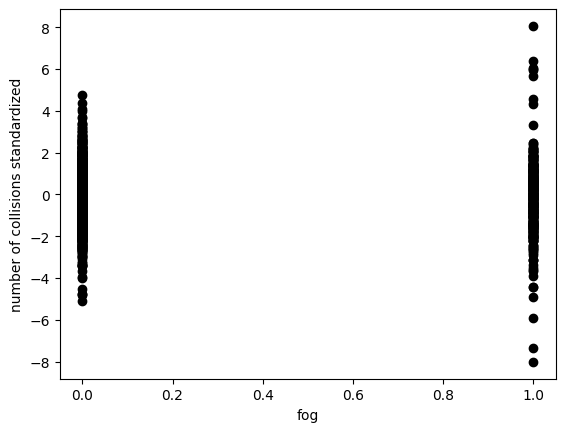

In [63]:
plt.scatter(input_data["fog"], dnn_predictions, color="black")
plt.xlabel("fog")
plt.ylabel("number of collisions standardized")

The results show high variance in comparison to the linear lines that were present in the linear regression models. This makes it harder to analyse the data in terms of trends and relationships, but instead the positioning of the dots can by analysed.

All of the scatter graphs tended to centralise towards 0 number of collisions standardized, which is as expected. The data for the max temperature and max speed seems to clump up into a centralised mass which hovered around 0 number of collisions standardized. Max temperature clumped up between 40-90 degrees Fahrenheit whilst max speed between 5-30 miles per hour.

Outliers in both the max wind speed and max temperature graphs have no trend, with the outliers for the y axis being at random points on the x axis and same vice versa.

Fog shows the trend found in the linear regression model: when fog is present, the number of collisions standardized seems to clump at less than without. However, the number of collisions standardized seems to vary more with fog than without.

# Conclusion

In summary, the deep neural network model shows that the number of collisions standardized tended to be on the negative side rather than the positive across all weather types. The data seemed to clump, with no noticeable trend in the outliers. Because of this high variance, it is hard to analyse and extract further information from the deep neural network model.